In [1]:
SHOW_PLOT_FLAG = True

In [2]:
import sys

sys.path.insert(0, '../')


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from constants import *
import matplotlib.gridspec as gridspec


## Loading QoE data

In [3]:
O_Fr = pd.read_csv('CuratedData/O_fr.txt', sep='\t')
V_Ge = pd.read_csv('CuratedData/V_Ge.txt', sep='\t')
cdf = [O_Fr, V_Ge]

## Plotting

----Drive StallTime 1s 0.30287 Bitrate 0.5891706083593635
----Drive StallTime 4s 0.376275510204082 Bitrate 0.35378985475953983
----Drive StallTime 1s 0.221923694779116 Bitrate 0.9075314591700134
----Drive StallTime 4s 0.965384 Bitrate 0.5594511378848728
Showing Plot  Sec6_Fig17


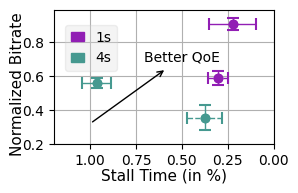

In [4]:
fig = plt.figure(figsize=(4,2))
gs1 = gridspec.GridSpec(1, 1, wspace=1.9, hspace=1, top=.90, bottom=0.23, left=0.2, right=0.75, figure=fig)

br = 'bitrate'
st = 'stallTime'
chkSize = 'chkSize'

####################=========> Plotting O_Fr
ax0 = plt.subplot(gs1[0])


for i in range(len(cdf)):
    df = cdf[i]
    
    # GRoup stallTime
    grouped_data_st_1s = df.groupby('chkSize')[st].agg(['mean', 'sem']).reset_index()
    confidence_interval = 0.9  
    grouped_data_st_1s['ci_low'] = grouped_data_st_1s['mean'] - confidence_interval * grouped_data_st_1s['sem']
    grouped_data_st_1s['ci_high'] = grouped_data_st_1s['mean'] + confidence_interval * grouped_data_st_1s['sem']
    
    # GRoup bitrate
    grouped_data_br_1s = df.groupby('chkSize')[br].agg(['mean', 'sem']).reset_index()
    confidence_interval = 0.90 # 95% confidence interval
    grouped_data_br_1s['ci_low'] = grouped_data_br_1s['mean'] - confidence_interval * grouped_data_br_1s['sem']
    grouped_data_br_1s['ci_high'] = grouped_data_br_1s['mean'] + confidence_interval * grouped_data_br_1s['sem']
    
    
    for c, df in df.groupby('chkSize'):
        if c == '1s':
            u = 'GER2'
            label = '1s'
            plotFlag = True
        elif c == '4s':
            u = 'SPA1_1'
            label = '4s'
            plotFlag = True
        print('----Drive StallTime ' + label + ' ' + str(df[st].median()) + ' Bitrate ' + str(df[br].mean()))
        ax0.scatter(df[st].median(), df[br].mean(), color=colors[u], label=c, s=20)
        grpDF = grouped_data_br_1s[grouped_data_br_1s['chkSize'] == c]
        ax0.errorbar(df[st].median(), df[br].mean(), yerr=[grpDF['mean'] - grpDF['ci_low'], grpDF['ci_high'] - grpDF['mean']],
                     color=colors[u], fmt='o', linestyle=':', elinewidth=1, capsize=4, capthick=1.5)
        grpDF = grouped_data_st_1s[grouped_data_st_1s['chkSize'] == c]
        eb1 = ax0.errorbar(df[st].median(), df[br].mean(), 
                     xerr=[grpDF['mean'] - grpDF['ci_low'], grpDF['ci_high'] - grpDF['mean']],
                    color=colors[u], fmt='o', elinewidth=1, capsize=4, capthick=1.5)
        # if u == GER2
        if i == 0:
            eb1[-1][0].set_linestyle('--')


ax0.yaxis.grid(True, which='major')
ax0.xaxis.grid(True, which='major')
ax0.set_xlim(0, 1.2)
ax0.set_ylim([0.2,0.99])
ax0.set_xlabel('Stall Time (in %)', fontsize=11)
ax0.set_ylabel('Normalized Bitrate', fontsize=11)
ax0.invert_xaxis() 
ax0.yaxis.set_label_coords(-0.13, 0.45)
ax0.xaxis.set_label_coords(0.5, -0.18)

ax0.annotate("Better QoE", xy=(1, 0.32), xycoords="data", 
    xytext=(0.5, 0.71), fontsize=10, color='k',
    va="center", ha="center", 
    bbox=dict(boxstyle="round", fc="w", alpha=0),
    arrowprops=dict(arrowstyle="<-", color='k', lw=1))



h1, = ax0.bar(-6, 1, edgecolor=colors['GER2'], color=colors['GER2'])
h2, = ax0.bar(-8, 1, edgecolor=colors['SPA1_1'], color=colors['SPA1_1'])

h1, = ax0.bar(-6, 1, edgecolor=colors['GER2'], color=colors['GER2'])
h2, = ax0.bar(-8, 1, edgecolor=colors['SPA1_1'], color=colors['SPA1_1'])


plt.legend((h1, h2), ('1s', '4s'),
                    loc='upper center',ncol=1, columnspacing=0.8,
                    bbox_to_anchor=(0.17, 0.94), facecolor='#dddddd',
                    handlelength=1, framealpha=.3, fontsize = 10, markerscale=1)

#### Showing plots
plot_name = 'Fig17'
plotme(plt, " Sec6", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)
